# Logistic Regression

You will implement logistic regression classifier.

Iris dataset with only 2 classes is provided to test the code.


In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("shuffled_2class_iris_dataset.csv")
print(df.head())

df = df.values
X = df[:,0:4]   # 100x4
y = df[:,4]     # 100x1


   sepal_width  sepal_length  petal_width  petal_length  class
0          5.6           3.0          4.1           1.3      0
1          5.4           3.9          1.7           0.4      1
2          5.6           3.0          4.5           1.5      0
3          5.0           3.5          1.6           0.6      1
4          5.5           2.4          3.7           1.0      0


In [ ]:
# Zero out the mean
diff = X.max(0) - X.min(0)
X = X - diff

# Create 90/10 trainig/test sets
train_data = X[0:90,0:4]; train_label = y[0:90]
test_data = X[90:100,0:4]; test_label = y[90:100]

zz = np.ones((len(test_data),1))
test_data = np.concatenate((zz,test_data), axis=1)  # 90x5
# test_data = 10x5, the first column is all 1's
#   1st feature of the first observation (1st row, 1st column): test_data[0,1]
#   4th feature of the second observation (2nd row, 3th column): test_data[1,4]

np.random.seed(1)

### Training

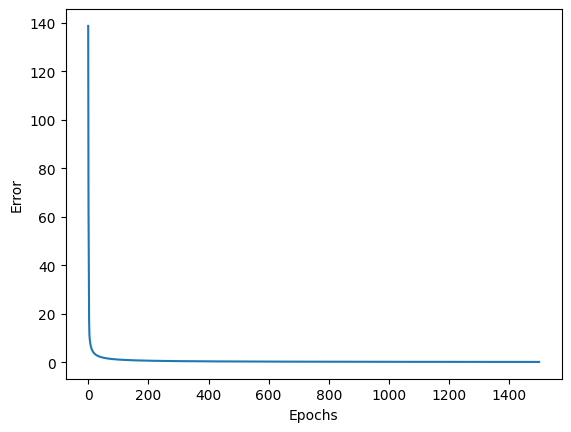

In [ ]:
# Use batch gradient descent to find the optimal weights of the sigmoid function

# Define the sigmoid function using numpy.exp
def sigmoid(t):
  # To-do
  # Compute the p given t
  p=1/(1+(np.exp(-t)))
  return (p)

# Define the logistic regression inference function
# It takes in a weight vector and a feature vector
def lr_inferencing(w_vec, x_vec):
  # To-do
  # Compute the dot product of the weight and feature vectors
  dot_product = np.dot(w_vec, x_vec)
  # Pass the dot product through the sigmoid function
  predicted_y = sigmoid(dot_product)
  # Return the predicted label (a value between 0 and 1)
  return predicted_y

# Train the model using the training data

# Initialization
alpha = 0.01
MAX_EPOCHS = 1500
cost_history = []

# Initialization of X_train and y_train
zz = np.ones((len(train_data),1))
X_train = np.concatenate((zz,train_data), axis=1)  # 90x5
#   X_train is 90x5; the first column is all 1's
#     1st feature of the first observation (1st row, 2nd column): X_train[0,1]
#     4th feature of the second observation (2nd row, 4th column): X_train[1,4]
y_train = train_label.reshape(len(train_label),1)  # 90x1
#   y_train is 90x1
#     the label of the first observation (1st row): y_train[0]
#     the label of the seventh observation (7th row): y_train[6]

# Initialization of weight_vector
w_vec = np.random.rand(5)

# Loop for 1500 epochs
for itr in range (MAX_EPOCHS):

    # Initialize gradient and cost to 0
    gradient = np.zeros(5)
    cost = 0

    # Loop over the training data
    for i in range(len(X_train)):
        # Extract the features and label for the current training example
        x_vec=X_train[i][0:5]
        y=y_train[i]

        # To-Do
        # Use the current weights to predict the label for this example
        y_pred = lr_inferencing(w_vec,x_vec)
        # Compute the gradient for this example and add it to the running total
        gradient += np.multiply((y_pred-y),x_vec)
        # Compute the cost for this example and add it to the running total
        cost += -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)

    # To-Do
    # Update the weights using the learning rate and the gradient
    w_vec -= np.multiply(alpha, gradient)

    # Collect the cost function result from each epoch to generate a plot
    # Append the current cost to the history of costs
    cost_history.append(cost) # 1500x1

# Plot cost function vs iterations
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### Testing

In [ ]:
# Now use the test set to test the model

# Print the actual and predicted class labels
# Print the average accuracy

correct_class_cnt = 0
for i in range (len(test_data)):

    # To-do:
    # Compute the probability for each test data and optimal weights
    # Find the predicted label y_hat based on threshold = 0.5
    y_pred = lr_inferencing(w_vec, test_data[i])
    y_hat = 0.0 if y_pred < 0.5 else 1.0

    # Check accuracy
    # print('y={}, y_hat={}'.format(test_label[i], y_hat))
    if (y_hat == test_label[i]):
        correct_class_cnt += 1

print('Average accuracy = {0:2f}'.format(correct_class_cnt/10))


Average accuracy = 1.000000


Caution: accuracy may change drastically because of overfitting (data set too small)

In [ ]:
# Print the optimal weights
print(w_vec)

[-1.03108688 -3.56294114  2.58115678 -4.58617494 -1.5198854 ]
